# Proyek Analisis Data: [BIKE Sharing Dataset/Days.csv]
- **Nama:** [Lidya Dwi Astuti]
- **Email:** [lidyadwiastuti00@gmail.com]
- **ID Dicoding:** [lidyadwia00]

## Menentukan Pertanyaan Bisnis

- Apakah cuaca Mempengaruhi Jumlah Pengguna Sepeda ?
- Pada Musim Cuaca apa penyewaan sepeda paling banyak ?

## Import Semua Packages/Library yang Digunakan

In [1]:
#Memanggil semua Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [4]:
#import dataset
days_df = pd.read_csv('/content/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dalam Tahapan ini kita akan masukan data set yang telah di kumpulkan data yang saya gunakan adalah data set Bike Sharing, maka dari itu saya mengimpor file day.csv

### Assessing Data

In [7]:
#pengecekan data dalam data days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dapat dilihat bahwa dalam kolom tipe data dteday masih terdapat tidak sesuaian.
Data yang perlu diperbaiki adalah dteday -> datetime

In [11]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Setelah Kolom Dteday sudah diperbaiki menjadi tipe data datetime, selanjutnya melakukan langkah pengecekan missing value.

1. Pengecekan apakah terdapat data yang missing value

In [9]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- Setelah melakukan pengecekan data ternyata tidak terdapat missing value


2. Langkah selanjutnya apakah ada data yang duplicate

In [10]:
print('Jumlah duplikasi:', days_df.duplicated().sum())

Jumlah duplikasi: 0


Setelah Melakukan Pengecekan Data ternyata tidak ada data yang duplicated.

### Cleaning Data

In [12]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data frame days_df sudah terbebas dari missing value, duplicate , dan inconsisten data type.

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Setelah Melakukan Pengecekan data dalam days_df dalam kolom temperatur, hum, windspeed memiliki nilai yang sudah di normalisasi. hal ini dapat menghambat proses explorasi data, maka dari itu saya akan melakukan reverse calculation terhadap kolom - kolom tersebut.

In [15]:
#Menghitung calculasi Temperatur
def reverse_calc(x):
    """
    Reverse Calcuation from Normalization
    N = (t-t_min)/(t_max-t_min) where t_min=-8, t_max=+39
    N = (t - (-8)) / (39 - (-8))
    N = (t + 8) / (47)
    find t from normalized value N
    t = 47N - 8

    args : x -> values from each data itself

    return : Approximate original value
    """
    result = (47 * x) - 8
    return round(result, 2)

days_df["reverse_temp"] = days_df["temp"].apply(lambda x : reverse_calc(x))

In [16]:
days_df["reverse_hum"] =days_df["hum"].apply(lambda x : x*100)
days_df["reverse_windspeed"] = days_df["windspeed"].apply(lambda x : x*67)

setelah melakukan reverse calculation kita akan melihat distribusi data kembali


In [17]:
days_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,reverse_temp,reverse_hum,reverse_windspeed
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.283092,62.789406,12.762576
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,-5.220000,0.000000,1.500244
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,7.840000,52.000000,9.041650
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,15.420000,62.666700,12.125325
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,22.805000,73.020850,15.625371
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,32.500000,97.250000,34.000021
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.603287,14.242910,5.192357


Berdasarkan code diatas :
1. penyewaan sepeda oleh pengguna casual selama 1 tahun memiliki nilai rata - rata penyewaan 848.176471 Sepeda dengan minimum penyewaan sepeda dalam 1 hari sebanyak 315.500000 sepeda.
2. Pengguna Register dalam penyewaan sepeda selama 1 tahun memiliki rata - rata penyewaan 3656.172367	sepeda dan Penyewaan Sepeda dalam 1 hari minimum 2497.000000 sepeda.
3. Berdasarkan kedua poin diatas dapat disimpulkan bahwa jumlah pengguna yang melakukan registrasi lebih banyak melakukan penyewaan sepeda jika dibandingkan dengan pengguna Casual

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Cuaca Mempengaruhi Jumlah Pengguna Sepeda ?

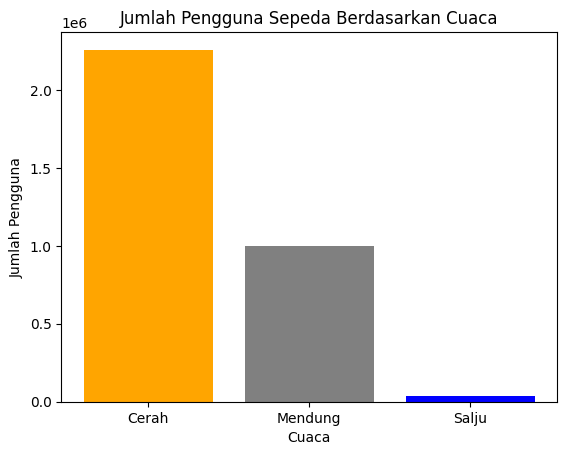

In [22]:
data_weathersit = days_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)
plt.bar(data_weathersit.index, data_weathersit.values,tick_label=['Cerah','Mendung','Salju'], color=['orange', 'grey','blue'])
plt.title('Jumlah Pengguna Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()

Berdasarkan hasil Visualisasi diatas menjelaskan bahwa jumlah penyewaan sepeda dipengaruhi oleh kondisi cuaca, dimana cuaca cerah memiliki banyak penyewaan sepeda lebih tinggi dibandingkan dengan cuaca mendung dan salju.

### Pertanyaan 2: Bulan apa penyewaan sepeda paling tertinggi ?

Text(0, 0.5, 'Count of rented bikes')

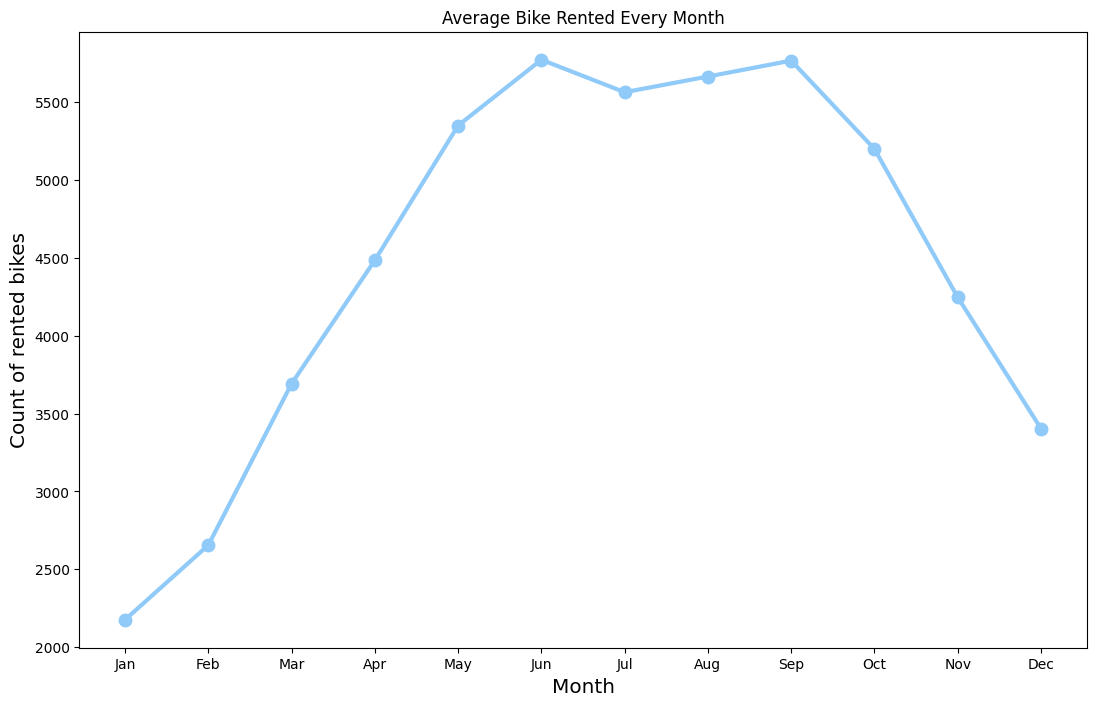

In [23]:
days_df['month_name'] = days_df['dteday'].apply(lambda x: x.strftime('%b'))
data_viz = days_df.groupby(["mnth","month_name"])[["cnt", "reverse_temp"]].mean().reset_index()
plt.figure(figsize=(13,8))
(ln,)=plt.plot(data_viz["month_name"],
         data_viz["cnt"],
         marker="o",
         markersize=9,
         color="#90CAF9",
         linewidth=3,)
plt.title("Average Bike Rented Every Month")
plt.xlabel("Month", fontsize="x-large")
plt.ylabel("Count of rented bikes", fontsize="x-large")

Insight :
- Seasonality : Terlihat sangat jelas bahwa terdapat tren seasonal dalam peminjaman sepeda. Peminjaman tertinggi ada pada saat Season Summer(June-Sep), sementara peminjaman terendah ada saat Season Winter(Januari, Desember).
- Drop off : Tren peminjaman sepeda perlahan menurun dimulai pada bulan October, hingga mencapai titik terendahnya pada bulan Januari.

Interpretasi :
Berdasarkan visualisasi diatas, terlihat dengan jelas bahwa Season memiliki influence tinggi terhadap peminjaman sepeda. Disaat masuk Season Summer orang-orang lebih suka beraktivitas diluar rumah dan hal ini menaikkan demand dalam peminjaman sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

Rekomendasi :
Berdasarkan analisis yang sudah dilakukan, dapat direkomendasikan:
1. Optimalisasi Stok Sepeda:
   - Menambahkan stok sepeda pada Season Summer: memastikan stok sepeda yang tersedia pada bulan Mei-Sep dapat memenuhi demand yang tinggi. Opsi penambahan ini bisa berupa penambahan jumlah sepeda pada setiap titik peminjamannya ataupun menjalin kerjasama seasonal dengan partner.
   - Mengurangi stok sepeda pada Season Winter : dengan demand yang rendah pada Season Winter, pengurangan stok sepeda yang dapat dipinjam akan mengurangi biaya maintenance dan storage yang berlebih. Selain itu, pada saat Season Winter berlangsung perusahaan dapat memprioritaskan maintenance sepeda-sepeda yang ditarik stoknya agar dapat digunakan pada Peak Season berikutnya.  
2. Seasonal Marketing Campaign:
   - Summer Promotions: Melakukan campaign secara aggresive pada Season Spring dengan menargetkan customer local dan tourist untuk mempersiapkan Season Summer. Menawarkan diskon ataupun bundles yang menarik untuk meningkatkan angka peminjaman sepeda
   - Targeted Fall Campaign: Meskipun rata-rata peminjaman pada Season Fall perlahan menurun, perusahaan dapat melakukan campaign dengan tema Season Fall untuk memberikan vibes nature sebelum memasuki Season Winter.
